# Bifurcation Diagrams

## Images in Sage

This allows us to create images:

In [1]:
from sage.repl.image import Image

You can type `Image?` for help in working with images. Here we create a 100x100 black and white image.

In [2]:
img = Image('1',(100,100))

Initially the image is all white as shown below:

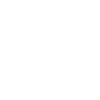

In [3]:
img.show()

The pixel (x,y) in the image can be set with the command:

``img.pixels()[int(x),int(y)]=int(0)``

Note that y-coordinate is opposite of math conventions. That is the top y-coordinate is zero.

Here we draw an X:

In [4]:
for i in range(100):
    img.pixels()[int(i),int(i)]=int(0)
    img.pixels()[int(i),int(99-i)]=int(0)

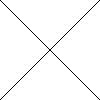

In [5]:
img.show()

## Bifurcation Diagram

The function `bifurcation_diagram` considers a family of functions F as below. Then we vary the parameter from `start_parameter` to `end_parameter` considering `param_count` parameters in total. For each parameter $\mu$, we consider the dynamics of $F_\mu$ on the interval $[a,b]$, and plot the dynamics on a vertical line. We divide $[a,b]$ into `subinterval` many subintervals.

To figure out what to plot we start at $x_0$. Then we apply the map $F_\mu$ a number of times equal to `initial_iterates`. Then we iterate `plot_iterates` many more times and plot points on the vertical line as we proceed.

In [6]:
def bifurcation_diagram(F, start_parameter, end_parameter, param_count, a, b, subintervals, x0, 
                        initial_iterates=1000, 
                        plot_iterates = 1000
                       ):
    from sage.repl.image import Image
    img = Image('1',(param_count,subintervals))
    for p in range(param_count):
        param = start_parameter + p*(end_parameter-start_parameter)/(param_count-1)
        f = F(param)
        x = x0
        try: # Used to catch numerical errors.

            # First set of applications of f.
            for i in range(initial_iterates):
                x = f(x).n() # Apply f and take a numerical approximation
                
            # Second set of applications. Now we plot points as well.
            for i in range(plot_iterates):
                q = floor(subintervals*(b-x)/(b-a))
                if 0 <= q < subintervals:
                    img.pixels()[int(p),int(q)]=int(0)
                x = f(x).n() # Apply f and take a numerical approximation
        except ValueError:
            # Just quit considering this parameter if we run into numerical errors.
            pass
        # Below we print a progress message.
        if (p % (param_count//10) == 0):
            print("%s percent done." % str(100*p//param_count))
    return img

## The Logistic Family

The logistic family of maps:

In [7]:
def F(mu):
    def F_mu(x):
        return mu*x*(1-x)
    return F_mu

The Bifurcation diagram for $F_\mu$ with $1<mu<4$ divided into 800 parameters, plotted in the interval $[0,1]$
divided into 800 subintervals with a starting point of $1/2$. We use $10000$ initial iterates followed by $1000$ iterates plotted.

0 percent done.
10 percent done.
20 percent done.
30 percent done.
40 percent done.
50 percent done.
60 percent done.
70 percent done.
80 percent done.
90 percent done.


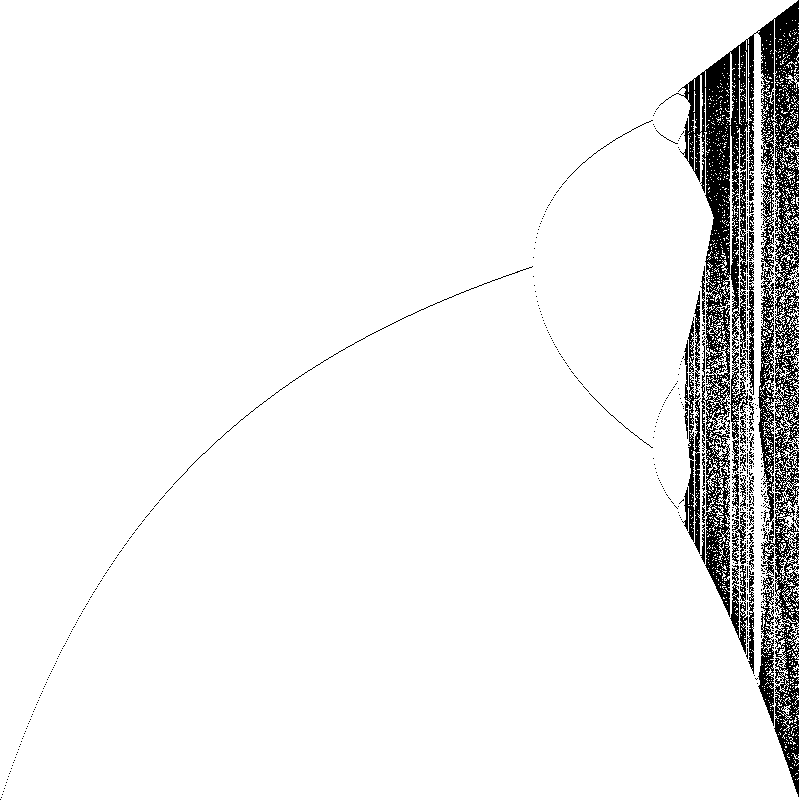

In [8]:
img = bifurcation_diagram(F, 1, 4, 800, 0, 1, 800, 0.5,  
                          initial_iterates=10000, 
                          plot_iterates = 1000)
img.show()

In [9]:
# To save the image you can do:
filename = "logisticA_"+str(img.width()) + "x" + str(img.height()) + ".png"
img.save(filename)
print("Saved to %s" % filename)

Saved to logisticA_800x800.png


This shows a sequence of period doubling bifurcations.

0 percent done.
10 percent done.
20 percent done.
30 percent done.
40 percent done.
50 percent done.
60 percent done.
70 percent done.
80 percent done.
90 percent done.


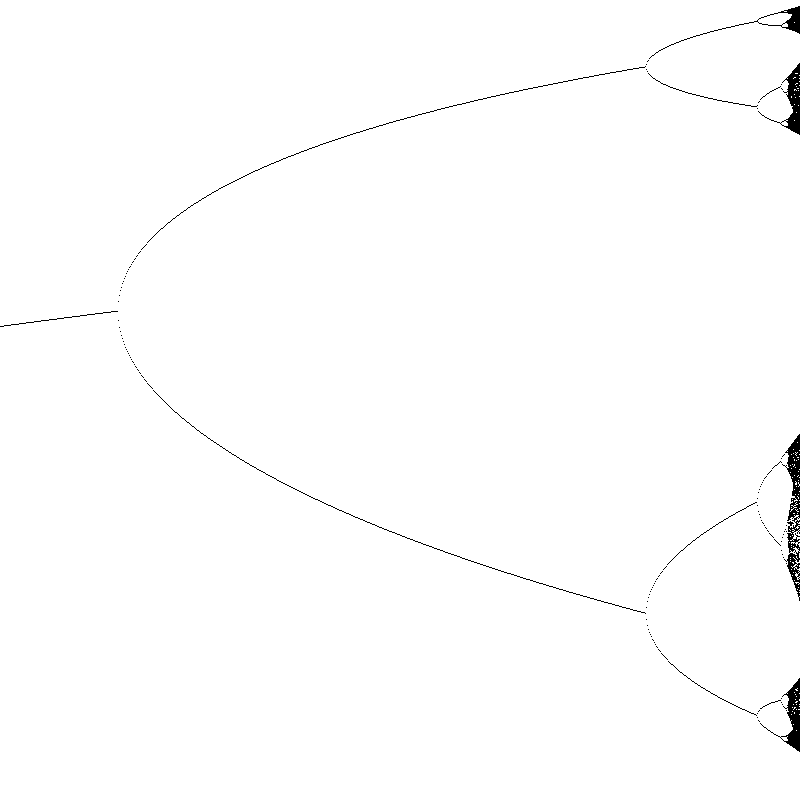

In [10]:
img = bifurcation_diagram(F, 2.9, 3.58, 800, 0.3, 0.9, 800, 0.5,  
                          initial_iterates=10000, 
                          plot_iterates = 1000)
img.show()

In [11]:
# To save the image you can do:
filename = "logisticB_"+str(img.width()) + "x" + str(img.height()) + ".png"
img.save(filename)
print("Saved to %s" % filename)

Saved to logisticB_800x800.png


As Devaney points out in section 1.13, there is an interval near $\mu=3.835$ where the logistic family has a period three attracting orbit. As $\mu$ increases, we again get a cascade of period doubling bifurcations.

0 percent done.
10 percent done.
20 percent done.
30 percent done.
40 percent done.
50 percent done.
60 percent done.
70 percent done.
80 percent done.
90 percent done.


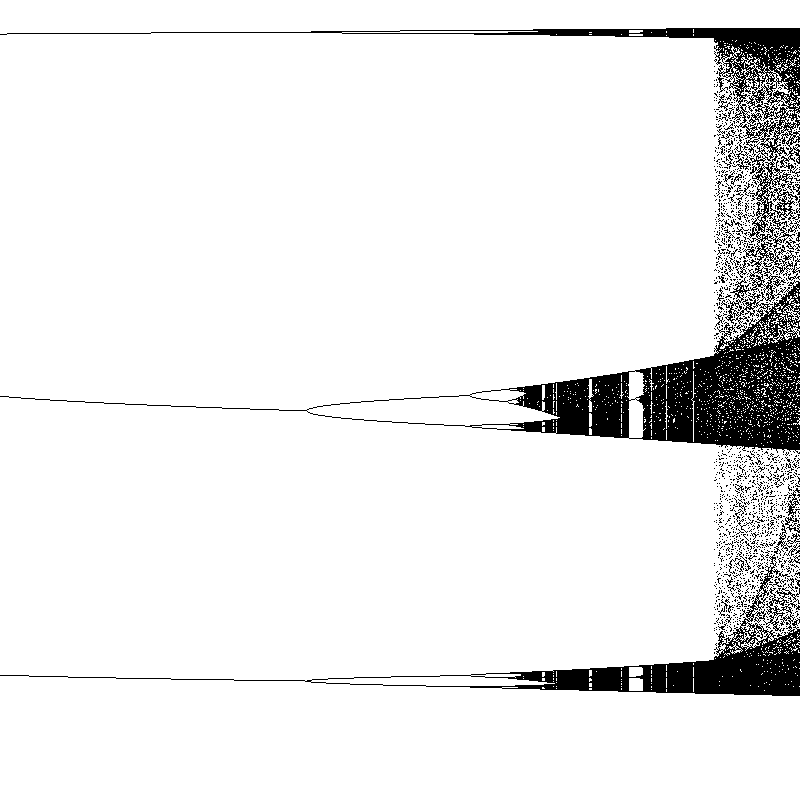

In [12]:
img = bifurcation_diagram(F, 3.83, 3.86, 800, 0, 1, 800, 0.5,  
                          initial_iterates=10000, 
                          plot_iterates = 1000)
img.show()

In [13]:
# To save the image you can do:
filename = "logisticC_"+str(img.width()) + "x" + str(img.height()) + ".png"
img.save(filename)
print("Saved to %s" % filename)

Saved to logisticC_800x800.png


## Devaney's Exponential Family

The family
$E_\lambda(x)=\lambda e^x.$

In [14]:
def E(ll):
    def E_ll(x):
        return (ll*e^x).n()
    return E_ll

0 percent done.
10 percent done.
20 percent done.
30 percent done.
40 percent done.
50 percent done.
60 percent done.
70 percent done.
80 percent done.
90 percent done.


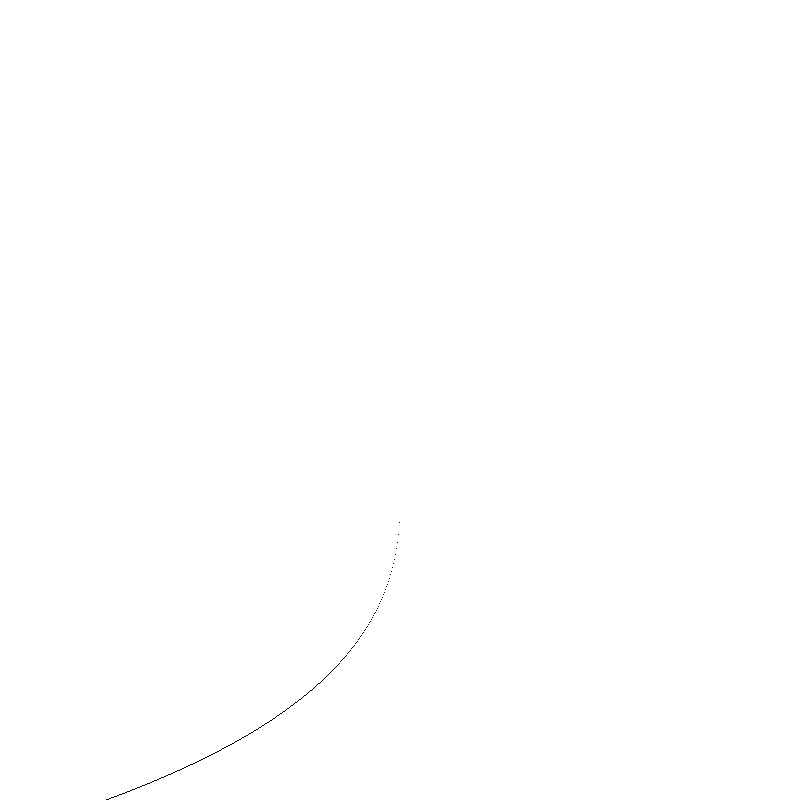

In [15]:
img = bifurcation_diagram(E, 1/e-0.5, 1/e+0.5, 800, 0.0, e.n(), 800, 0,
                          initial_iterates=1000, 
                          plot_iterates = 1000)
img.show()

## Devaney's Sine Family

The family
$S_\lambda(x)=\lambda \sin(x).$

In [16]:
def S(ll):
    def S_ll(x):
        return ll*sin(x)
    return S_ll

0 percent done.
10 percent done.
20 percent done.
30 percent done.
40 percent done.
50 percent done.
60 percent done.
70 percent done.
80 percent done.
90 percent done.


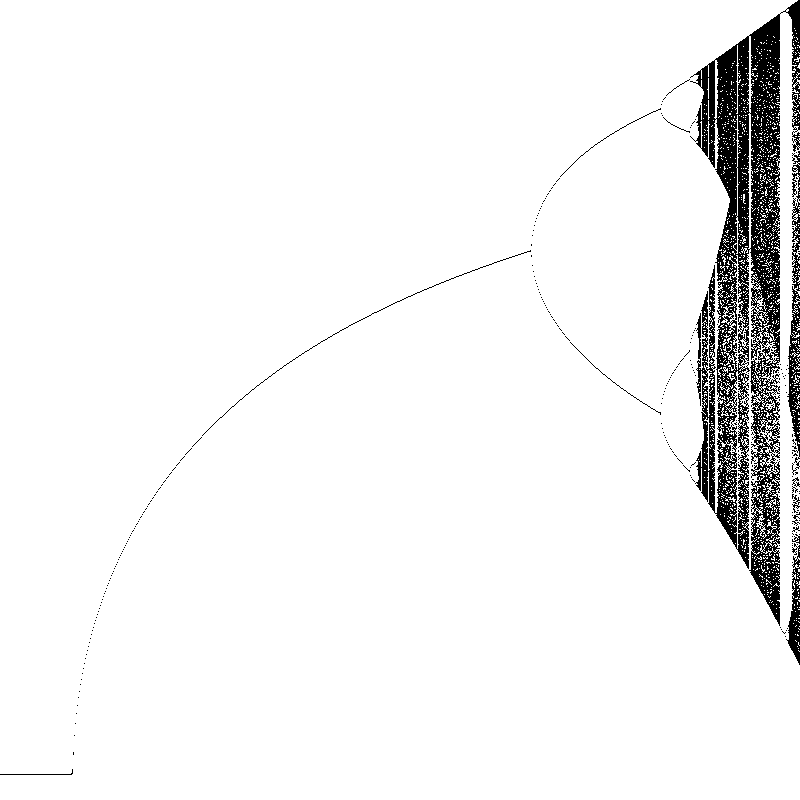

In [17]:
img = bifurcation_diagram(S, 0.8, 3, 800, -0.1, 3.0, 800, pi/2,
                          initial_iterates=1000, 
                          plot_iterates = 1000)
img.show()